### Network plots

In [14]:
import pandas as pd 
import numpy as np 
import argparse 
import warnings
import networkx as nx 
warnings.filterwarnings("ignore")

filedir="Volumes/phd/Code_Development_2022/biogel/results/snapshot_analysis/final_plots"
conddir="std_conditions_xyz"
files=['00115']
fprestring="poly/xyz-files"
filen="biogel_9900.0.xyz"
for fi in files:
    fstring="/{}/{}/{}/{}/{}".format(filedir,conddir,fi,fprestring,filen)
    df = pd.read_csv(fstring, delim_whitespace=True, names=["ptype",'x','y','z'])

    Npoly=340
    l_poly=30

    a = np.arange(1, Npoly + 1)
    b = np.arange(1, l_poly + 1)
    f_to_number = lambda tup: (tup[0] - 1) * l_poly + (tup[1] - 1)
    arr_combinations = np.array([np.meshgrid(a, b)]).T.reshape(-1, 2)
    tuple_combinations = [(i, j) for [i, j] in arr_combinations]
    map_to_number = list(map(f_to_number, tuple_combinations))
    dict_to_number = dict(zip(tuple_combinations, map_to_number))
    dict_to_tuple = dict(zip(map_to_number,tuple_combinations))

    df['index'] = df.reset_index().index
    df['poly_id'] = df.index//l_poly

    df_cross = df[df.ptype=='C']
    arr_poly_id = df_cross.poly_id.values
    arr_index = df_cross.index.values
    arr_pos = df_cross[['x','y','z']].values 

    linker_arr = []
    poly_arr = []

    L=np.ones(3)*30
    sigma=1.5

    # get all bonds 
    for inum,index_i in enumerate(arr_index):
        for jnum, index_j in enumerate(arr_index):
            if inum<jnum:
                dist = arr_pos[inum] - arr_pos[jnum]
                dist = dist - L*np.rint(dist/L)
                dnorm = np.linalg.norm(dist)
                if dnorm<sigma:
                    linker_arr.append([index_i,index_j])
                    poly_arr.append([arr_poly_id[inum],arr_poly_id[jnum]])
    
    pos_arr = df[['x','y','z']].values
    
    for i,posi in enumerate(pos_arr[::-1]):
        a = i//l_poly 
        b = (i+1)//l_poly
        
        if a==b:
            linker_arr.append([i,i+1])
        
 
    dh = pd.DataFrame(data=linker_arr, index=None, columns=['source','target'])
    dh.to_csv("00115_network.csv")


In [20]:
from MulticoreTSNE import MulticoreTSNE as TSNE

import pandas as pd 
import numpy as np 
import argparse 
import warnings
import networkx as nx 
warnings.filterwarnings("ignore")

filedir="Volumes/phd/Code_Development_2022/biogel/results/snapshot_analysis/final_plots"
conddir="std_conditions_xyz"
files=['00111']
fprestring="poly/xyz-files"
filen="color_pid_biogel_9900.0.xyz"
for fi in files:
    fstring="/{}/{}/{}/{}/{}".format(filedir,conddir,fi,fprestring,filen)
    df = pd.read_csv(fstring, delim_whitespace=True, names=["ptype",'x','y','z'])

    X = df[['x','y','z']].values
    tsne = TSNE(n_jobs=7)
    Y = tsne.fit_transform(X)
    
   
   

[(0.267004, 0.004874, 0.329415), (0.26851, 0.009605, 0.335427), (0.269944, 0.014625, 0.341379), (0.269944, 0.014625, 0.341379), (0.271305, 0.019942, 0.347269), (0.272594, 0.025563, 0.353093), (0.273809, 0.031497, 0.358853), (0.273809, 0.031497, 0.358853), (0.274952, 0.037752, 0.364543), (0.276022, 0.044167, 0.370164), (0.277018, 0.050344, 0.375715), (0.277018, 0.050344, 0.375715), (0.277941, 0.056324, 0.381191), (0.278791, 0.062145, 0.386592), (0.279566, 0.067836, 0.391917), (0.279566, 0.067836, 0.391917), (0.280267, 0.073417, 0.397163), (0.280894, 0.078907, 0.402329), (0.281446, 0.08432, 0.407414), (0.281446, 0.08432, 0.407414), (0.281924, 0.089666, 0.412415), (0.282327, 0.094955, 0.417331), (0.282656, 0.100196, 0.42216), (0.282656, 0.100196, 0.42216), (0.28291, 0.105393, 0.426902), (0.283091, 0.110553, 0.431554), (0.283197, 0.11568, 0.436115), (0.283197, 0.11568, 0.436115), (0.283229, 0.120777, 0.440584), (0.283187, 0.125848, 0.44496), (0.283072, 0.130895, 0.449241), (0.283072, 0.130

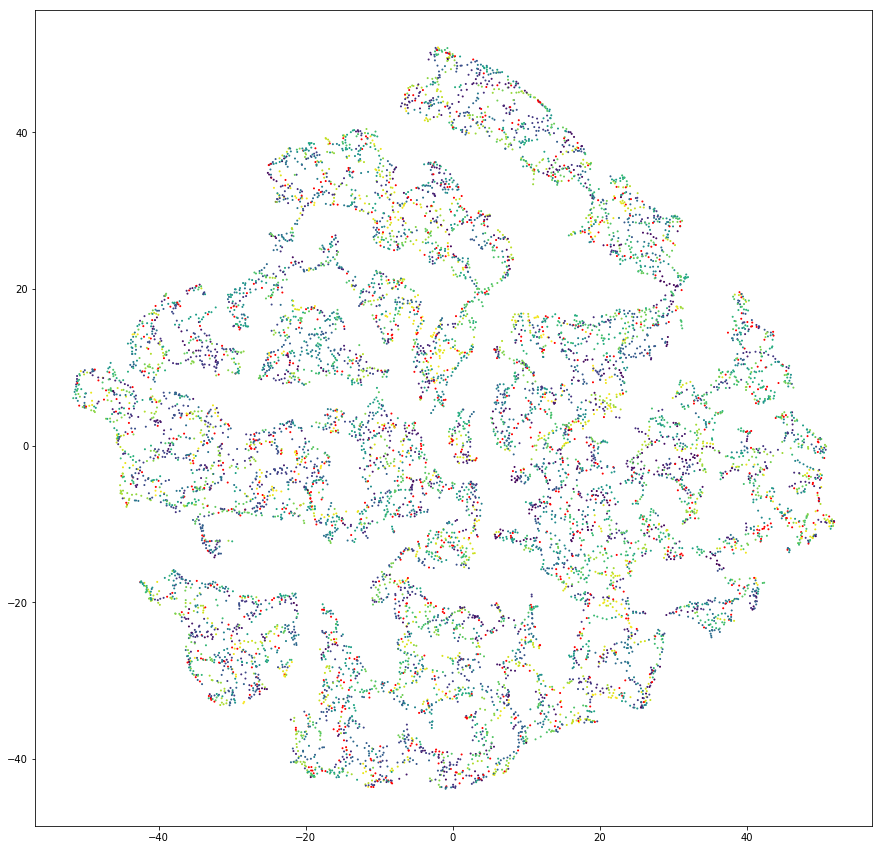

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 

color_list = sns.color_palette('viridis', len(df['ptype'].unique()))
color_dict=dict(zip(sorted(df['ptype'].unique()), color_list))    
color_dict['C'] = (1,0,0)
fig,ax=plt.subplots(figsize=(15,15))
plt.scatter(Y[:,0],Y[:,1],s=1,color=[ color_dict[i] for i in df['ptype'].values ])

plt.savefig("test_00111.pdf")
plt.show()

[  0   0   0 ... 338 339 339]


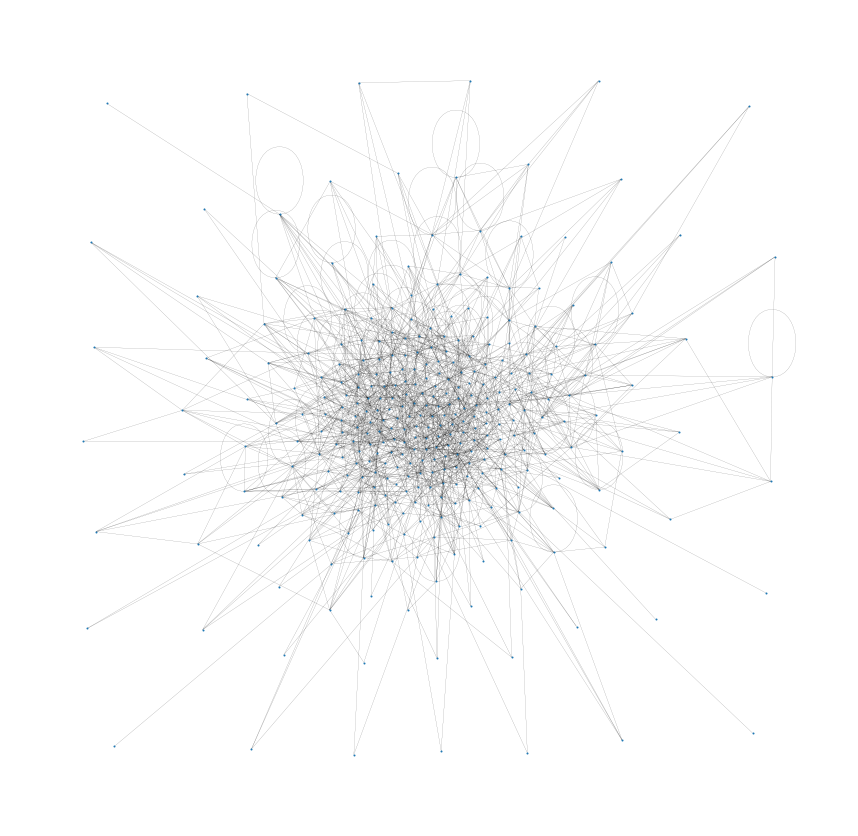

In [20]:
print(arr_poly_id)
G=nx.Graph()

fig,ax=plt.subplots(figsize=(15,15))

G.add_edges_from(poly_arr)


nx.draw(G, pos= nx.nx_pydot.graphviz_layout(G, prog="fdp"), node_size=1,width=0.1)
plt.show()

In [33]:
dh = pd.DataFrame(data=poly_arr, index=None, columns=['source','target'])
dh.to_csv("00115_network_polymer.csv")



In [42]:
from MulticoreTSNE import MulticoreTSNE as TSNE

import pandas as pd 
import numpy as np 
import argparse 
import warnings
import networkx as nx 
warnings.filterwarnings("ignore")

filedir="Volumes/phd/Code_Development_2022/biogel/results/snapshot_analysis/final_plots"
conddir="std_conditions_xyz"
files=['00115']
fprestring="poly/xyz-files"
filen="biogel_9900.0.xyz"
for fi in files:
    fstring="/{}/{}/{}/{}/{}".format(filedir,conddir,fi,fprestring,filen)
    df = pd.read_csv(fstring, delim_whitespace=True, names=["ptype",'x','y','z'])

    X = df[['x','y','z']].values
    tsne = TSNE(n_jobs=7)
    Y = tsne.fit_transform(X)
    


12166 10200
10200


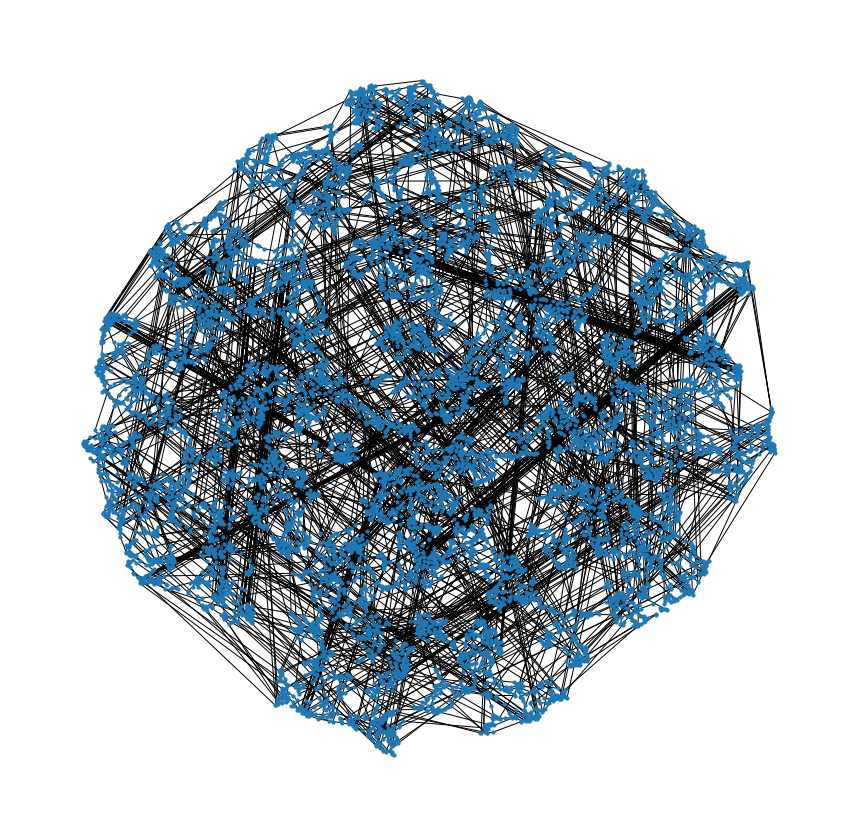

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns 

'''
color_list = sns.color_palette('viridis', len(df['ptype'].unique()))
color_dict=dict(zip(sorted(df['ptype'].unique()), color_list))    
color_dict['C'] = (1,0,0)
fig,ax=plt.subplots(figsize=(15,15))
plt.scatter(Y[:,0],Y[:,1],s=1,color=[ color_dict[i] for i in df['ptype'].values ])
plt.savefig("test_00111.pdf")
'''

G=nx.Graph()
print(len(linker_arr),len(Y))
fig,ax=plt.subplots(figsize=(15,15))
G.add_edges_from(linker_arr)
print(G.number_of_nodes())


nx.draw(G, pos=Y, node_size=10)
plt.show()

In [2]:
import pandas as pd 
import numpy as np 
import argparse 
import warnings
import networkx as nx 
warnings.filterwarnings("ignore")

filedir="Volumes/phd/Code_Development_2022/biogel/results/snapshot_analysis/final_plots"
conddir="std_conditions_xyz"
files=['00115']
fprestring="poly/xyz-files"
filen="cluster_pid_biogel_9900.0.xyz"
for fi in files:
    fstring="/{}/{}/{}/{}/{}".format(filedir,conddir,fi,fprestring,filen)
    df = pd.read_csv(fstring, delim_whitespace=True, names=["ptype",'x','y','z'])
     
    Npoly=340
    l_poly=30

    a = np.arange(1, Npoly + 1)
    b = np.arange(1, l_poly + 1)
    f_to_number = lambda tup: (tup[0] - 1) * l_poly + (tup[1] - 1)
    arr_combinations = np.array([np.meshgrid(a, b)]).T.reshape(-1, 2)
    tuple_combinations = [(i, j) for [i, j] in arr_combinations]
    map_to_number = list(map(f_to_number, tuple_combinations))
    dict_to_number = dict(zip(tuple_combinations, map_to_number))
    dict_to_tuple = dict(zip(map_to_number,tuple_combinations))

    df['index'] = df.reset_index().index
    df['poly_id'] = df.index//l_poly

    df_cross = df[df.ptype=='C']
    arr_poly_id = df_cross.poly_id.values
    arr_index = df_cross.index.values
    arr_pos = df_cross[['x','y','z']].values 

    linker_arr = []
    poly_arr = []

    L=np.ones(3)*30
    sigma=1.5

    # get all bonds 
    for inum,index_i in enumerate(arr_index):
        for jnum, index_j in enumerate(arr_index):
            if inum<jnum:
                dist = arr_pos[inum] - arr_pos[jnum]
                dist = dist - L*np.rint(dist/L)
                dnorm = np.linalg.norm(dist)
                if dnorm<sigma:
                    linker_arr.append([index_i,index_j])
                    poly_arr.append([arr_poly_id[inum],arr_poly_id[jnum]])
    
    pos_arr = df[['x','y','z']].values
    
    for i,posi in enumerate(pos_arr[::-1]):
        a = i//l_poly 
        b = (i+1)//l_poly
        
        if a==b:
            linker_arr.append([i,i+1])
        
 
    dh = pd.DataFrame(data=linker_arr, index=None, columns=['source','target'])
    dh.to_csv("00115_network_bigget_cluster.csv")

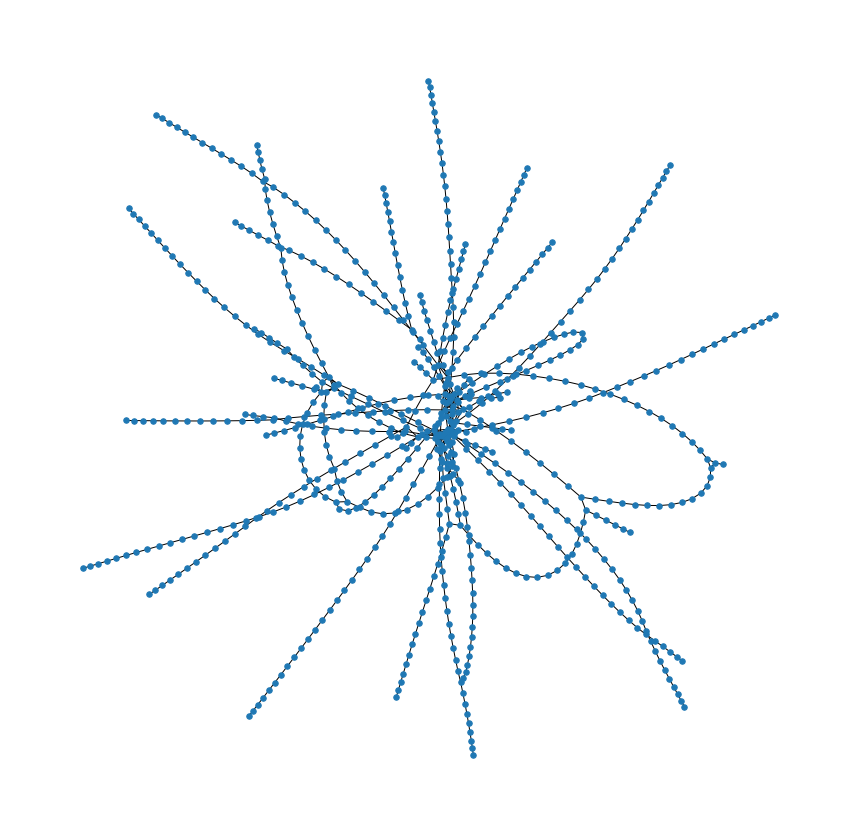

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 


G=nx.Graph()

fig,ax=plt.subplots(figsize=(15,15))
G.add_edges_from(linker_arr)

nx.draw(G, pos= nx.nx_pydot.graphviz_layout(G, prog="fdp"), node_size=30)
plt.show()